In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

from moviepy.video.io.bindings import mplfig_to_npimage#动图生成
import moviepy.editor as mpy

import math

In [2]:
def F_plus(phi,theta, psi):
# Antenna pattern function(F_plus)
# R = F_PLUS(PHI, THETA, PSI)
# the antenna pattern functions (F_plus), phi, theta are sky angles, psi is a rotation angle of x_hat and y_hat

# Shucheng Yang, February 2019

    # Detector Tensor 

    n_x = np.array([1, 0, 0]);
    n_y = np.array([0, 1, 0]);

    D = 1/2 * (np.outer(n_x,n_x) - np.outer(n_y,n_y));
    
    #Polarization Tensor
    n = [np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)];
    n = n / np.linalg.norm(n);

    Z = np.array([0, 0, 1]);

    x_hat = np.cross(Z,n);
    x_hat = x_hat / np.linalg.norm(x_hat);

    y_hat = np.cross(x_hat,n);
    y_hat = y_hat / np.linalg.norm(y_hat);
    
    
    #rotation of x_hat and y_hat
    M = np.array([[np.cos(psi) + (1 - np.cos(psi)) * n[0]**2, (1 - np.cos(psi)) * n[0] * n[1] - np.sin(psi) * n[2], (1 - np.cos(psi)) * n[0] * n[2] + np.sin(psi) * n[1]],
                 
                 [ (1 - np.cos(psi)) * n[1]*n[0] + np.sin(psi) * n[2], np.cos(psi) + (1 - np.cos(psi)) * n[1]**2, (1 - np.cos(psi)) * n[1] * n[2] + np.sin(psi) * n[0]],
                  
                  [(1 - np.cos(psi)) * n[2]*n[0] - np.sin(psi) * n[1], (1 - np.cos(psi)) * n[2] * n[1] - np.sin(psi) * n[0], np.cos(psi) + (1 - np.cos(psi)) * n[2]**2]])
    
    x_hat = np.inner(M, x_hat);
    y_hat = np.inner(M, y_hat);
    
    

    #e_plus
    e_plus = np.outer(x_hat,x_hat) - np.outer(y_hat, y_hat) 
    result = sum(sum(D * e_plus))
    return abs(result)


In [3]:
def F_cross(phi,theta,psi):
#Antenna pattern function(F_cross)
#R = F_PLUS(PHI, THETA, PSI)
#the antenna pattern functions (F_cross), phi, theta are sky angles, psi is a rotation angle of x_hat and y_hat

#Shucheng Yang, February 2019


    # Detector Tensor 
    n_x = np.array([1, 0, 0]);
    n_y = np.array([0, 1, 0]);

    D = 1/2 * (np.outer(n_x,n_x) - np.outer(n_y,n_y));
    
    #Polarization Tensor
    n = [np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)];
    n = n / np.linalg.norm(n);

    Z = np.array([0, 0, 1]);

    x_hat = np.cross(Z,n);
    x_hat = x_hat / np.linalg.norm(x_hat);

    y_hat = np.cross(x_hat,n);
    y_hat = y_hat / np.linalg.norm(y_hat);

    
    #rotation of x_hat and y_hat
    M = np.array([[np.cos(psi) + (1 - np.cos(psi)) * n[0]**2, (1 - np.cos(psi)) * n[0] * n[1] - np.sin(psi) * n[2], (1 - np.cos(psi)) * n[0] * n[2] + np.sin(psi) * n[1]],
                 
                 [ (1 - np.cos(psi)) * n[1]*n[0] + np.sin(psi) * n[2], np.cos(psi) + (1 - np.cos(psi)) * n[1]**2, (1 - np.cos(psi)) * n[1] * n[2] + np.sin(psi) * n[0]],
                  
                  [(1 - np.cos(psi)) * n[2]*n[0] - np.sin(psi) * n[1], (1 - np.cos(psi)) * n[2] * n[1] - np.sin(psi) * n[0], np.cos(psi) + (1 - np.cos(psi)) * n[2]**2]])
    
    x_hat = np.inner(M, x_hat);
    y_hat = np.inner(M, y_hat);
    
    #e_cross
    e_cross = np.outer(x_hat, y_hat) + np.outer(y_hat, x_hat) 
    result = sum(sum(D * e_cross))
    return abs(result)

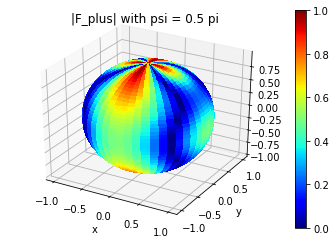

In [4]:
surfF = np.frompyfunc(F_plus,3,1) #表面函数，需将普通函数转换为通用函数

phi, theta = np.linspace(0.001, 2 *np.pi, 50), np.linspace(0.001, np.pi, 50)
PHI, THETA = np.meshgrid(phi, theta)

R = 1#np.cos(PHI**2) # 球面半径
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

psi = np.pi/2
PSI = 0 * np.cos(THETA) + psi#旋转角

# surfF = np.sin(THETA + PHI)
surfFO = surfF(PHI, THETA,PSI).astype(np.float64)


fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plt.title('|F_plus| with psi = %s pi'%((psi)/np.pi))
plt.xlabel('x')
plt.ylabel('y')
norm = matplotlib.colors.Normalize(vmin=surfFO.min().min(), vmax=surfFO.max().max())
plot = ax.plot_surface(
    X, Y, Z, cmap=plt.get_cmap('jet'), 
    linewidth=0, antialiased= False, facecolors=plt.cm.jet(surfFO) ) #球面函数

m = plt.cm.ScalarMappable(cmap=plt.cm.jet)#, norm=norm)
m.set_array([])
plt.colorbar(m)
plt.show()

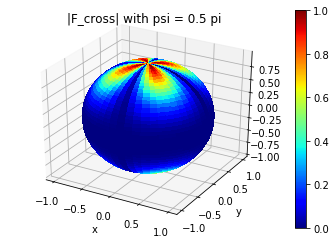

In [5]:
surfF = np.frompyfunc(F_cross,3,1) #表面函数，需将普通函数转换为通用函数

phi, theta = np.linspace(0.001, 2 *np.pi, 50), np.linspace(0.001, np.pi, 50)
PHI, THETA = np.meshgrid(phi, theta)


R = 1#np.cos(PHI**2) # 球面半径
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)


PSI = 0 * np.cos(THETA) + np.pi/2

# surfF = np.sin(THETA + PHI)
surfFO = surfF(PHI, THETA,PSI).astype(np.float64)


fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plt.title('|F_cross| with psi = %s pi'%((psi)/np.pi))
plt.xlabel('x')
plt.ylabel('y')
norm = matplotlib.colors.Normalize(vmin=surfFO.min().min(), vmax=surfFO.max().max())
plot = ax.plot_surface(
    X, Y, Z, cmap=plt.get_cmap('jet'), 
    linewidth=0, antialiased= False, facecolors=plt.cm.jet(surfFO) ) #球面函数

m = plt.cm.ScalarMappable(cmap=plt.cm.jet)#, norm=norm)
m.set_array([])
plt.colorbar(m)
plt.show()

 99%|█████████▉| 90/91 [02:13<00:01,  1.48s/it]


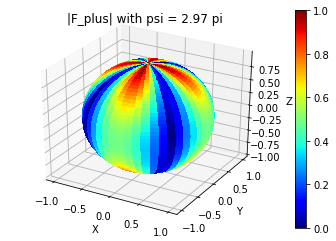

In [8]:
surfF = np.frompyfunc(F_plus,3,1) #表面函数，需将普通函数转换为通用函数

#绘动图3d#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
duration = 9 #总共的时间       figsize代表横纵比
speed = 1.0
nn = 1.5 # 旋转圈数
R = 1#np.cos(PHI**2) # 球面半径


fig_mpl = plt.figure()
ax = fig_mpl.add_subplot(111, projection='3d')

#colorbar
m = plt.cm.ScalarMappable(cmap=plt.cm.jet)#, norm=norm)
m.set_array([])
plt.colorbar(m)


def make_frame_mpl(t):
	ax.clear()
    
	# data
	phi, theta = np.linspace(0.001, 2 *np.pi, 50), np.linspace(0.001, np.pi, 50)
	PHI, THETA = np.meshgrid(phi, theta)

	X = R * np.sin(THETA) * np.cos(PHI)
	Y = R * np.sin(THETA) * np.sin(PHI)
	Z = R * np.cos(THETA)

	PSI = 0 * np.cos(THETA) + nn * 2 * np.pi * (t/duration)#旋转角
    
	surfFO = surfF(PHI, THETA,PSI).astype(np.float64)
	norm = matplotlib.colors.Normalize(vmin=surfFO.min().min(), vmax=surfFO.max().max())
	plot = ax.plot_surface(X, Y, Z,
                           cmap=plt.get_cmap('jet'), 
                           linewidth=0, antialiased= False, facecolors=plt.cm.jet(surfFO) ) #球面函数
	ax.set_title('|F_plus| with psi = %.2f pi'%((2 * nn *  t/duration)))
	ax.set_zlabel('Z') #坐标轴
	ax.set_ylabel('Y')
	ax.set_xlabel('X')
	return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=duration) #duration表示所制作视频正常速度播放的时间
# animation.speedx(speed).write_gif("GR.gif", fps=30) #输出gif, speedx表示播放速度(1.0为正常速度), fps每秒帧数

animation.speedx(speed).ipython_display(fps=10, loop=1, autoplay=1) #用于在Jupyter上输出，也可python3 本地输出mp4,speedx表示播放速度(1.0为正常速度), fps每秒帧数,loop表示是否循环播放(1或者0)，autoplay表示是否自动播放(1或者0)

 99%|█████████▉| 90/91 [02:15<00:01,  1.51s/it]


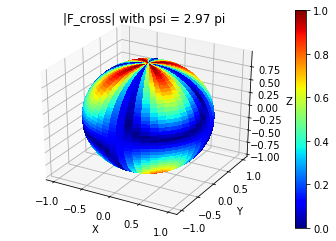

In [9]:
surfF = np.frompyfunc(F_cross,3,1) #表面函数，需将普通函数转换为通用函数

#绘动图3d#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
duration = 9 #总共的时间       figsize代表横纵比
speed = 1.0
nn = 1.5 # 旋转圈数
R = 1#np.cos(PHI**2) # 球面半径


fig_mpl = plt.figure()
ax = fig_mpl.add_subplot(111, projection='3d')

#colorbar
m = plt.cm.ScalarMappable(cmap=plt.cm.jet)#, norm=norm)
m.set_array([])
plt.colorbar(m)


def make_frame_mpl(t):
	ax.clear()
    
	# data
	phi, theta = np.linspace(0.001, 2 *np.pi, 50), np.linspace(0.001, np.pi, 50)
	PHI, THETA = np.meshgrid(phi, theta)

	X = R * np.sin(THETA) * np.cos(PHI)
	Y = R * np.sin(THETA) * np.sin(PHI)
	Z = R * np.cos(THETA)

	PSI = 0 * np.cos(THETA) + nn * 2 * np.pi * (t/duration)#旋转角
    
	surfFO = surfF(PHI, THETA,PSI).astype(np.float64)
	norm = matplotlib.colors.Normalize(vmin=surfFO.min().min(), vmax=surfFO.max().max())
	plot = ax.plot_surface(X, Y, Z,
                           cmap=plt.get_cmap('jet'), 
                           linewidth=0, antialiased= False, facecolors=plt.cm.jet(surfFO) ) #球面函数
	ax.set_title('|F_cross| with psi = %.2f pi'%((2 * nn * t/duration)))
	ax.set_zlabel('Z') #坐标轴
	ax.set_ylabel('Y')
	ax.set_xlabel('X')
	return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=duration) #duration表示所制作视频正常速度播放的时间
# animation.speedx(speed).write_gif("GR.gif", fps=30) #输出gif, speedx表示播放速度(1.0为正常速度), fps每秒帧数

animation.speedx(speed).ipython_display(fps=10, loop=1, autoplay=1) #用于在Jupyter上输出，也可python3 本地输出mp4,speedx表示播放速度(1.0为正常速度), fps每秒帧数,loop表示是否循环播放(1或者0)，autoplay表示是否自动播放(1或者0)